In [2]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [3]:
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
# Look at the data type of the variables: numpy arrays
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
# Get the shape of the arrays
print('x_train shaple:',x_train.shape)  # 50000 rows of data with 32x32 images with depth 3 (color)
print('y_train shaple:',y_train.shape) # 50000 rows of data and 1 column
print('x_test shaple:',x_test.shape) 
print('y_test shaple:',y_test.shape)

x_train shaple: (50000, 32, 32, 3)
y_train shaple: (50000, 1)
x_test shaple: (10000, 32, 32, 3)
y_test shaple: (10000, 1)


In [7]:
# Take a look at the first image as an array
index = 10
x_train[index] # we can see image like an array


array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

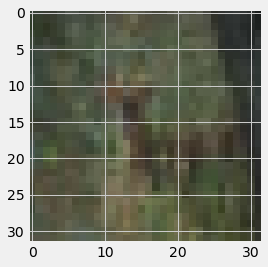

In [8]:
# show image as a picture
img = plt.imshow(x_train[index])   

In [9]:
# Get the image label
print('The image label is:', y_train[index])  

The image label is: [4]


In [10]:
# Get the image classification
classification = ['airplane', 'autombile','bird','cat','deer','dog','frog','horse','ship','truck']

# Print the image class
print('The image class is:', classification[y_train[index][0]])


The image class is: deer


In [11]:
# Convert the labels into a set of 10 numbers to input the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
# Print new labels
print(y_train_one_hot) # set of 10 numbers. All columns contains value 0, except of one that contains value 1
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [13]:
# Print the new label of the image/picture above

print('The one hot label is:', y_train_one_hot[index]) # position index

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [14]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train /255
x_test = x_test /255

In [15]:
x_train[index]  # values between 0 and 1

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [16]:
# Create the architecture
model = Sequential()

#Add the first layer
# Convulution layer to extract features from input images 
model.add( Conv2D(32, (5,5), activation = 'relu', input_shape = (32,32,3)) )

#Add a pooling layer
# 2x2 pixel filter to get the max elements from picture maps
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another convolution layer
model.add( Conv2D(32, (5,5), activation = 'relu') )

# Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a flattenining layer
# Reduce the dimensionality to linear array
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000,activation = 'relu'))

# Add a drop out layer 
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500,activation = 'relu'))

# Add a drop out layer 
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250,activation = 'relu'))

# Add a layer with 10 neurons
model.add(Dense(10,activation = 'softmax'))


In [17]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [18]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 334s 2s/step - loss: 1.9904 - accuracy: 0.2533 - val_loss: 1.4814 - val_accuracy: 0.4471
Epoch 2/10
157/157 [==============================] - 103s 653ms/step - loss: 1.4324 - accuracy: 0.4786 - val_loss: 1.2519 - val_accuracy: 0.5463
Epoch 3/10
157/157 [==============================] - 46s 296ms/step - loss: 1.2633 - accuracy: 0.5457 - val_loss: 1.1630 - val_accuracy: 0.5858
Epoch 4/10
157/157 [==============================] - 47s 298ms/step - loss: 1.1409 - accuracy: 0.5882 - val_loss: 1.1393 - val_accuracy: 0.5950
Epoch 5/10
157/157 [==============================] - 48s 304ms/step - loss: 1.0500 - accuracy: 0.6242 - val_loss: 1.0418 - val_accuracy: 0.6264
Epoch 6/10
157/157 [==============================] - 47s 300ms/step - loss: 0.9647 - accuracy: 0.6584 - val_loss: 0.9749 - val_accuracy: 0.6590
Epoch 7/10
157/157 [==============================] - 47s 299ms/step - loss: 0.9025 - accuracy: 0.6815 - val_loss: 0.9635 - val_acc

In [19]:
# Evaluate the model using the test data set
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 4s 11ms/step - loss: 0.9213 - accuracy: 0.6800


0.6800000071525574

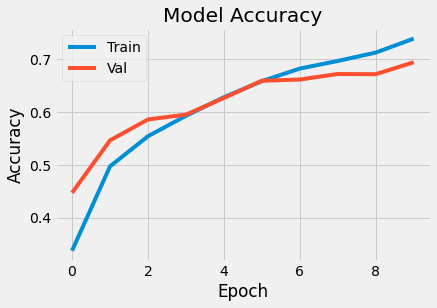

In [20]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()


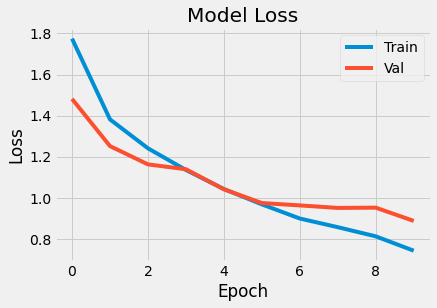

In [21]:
# Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

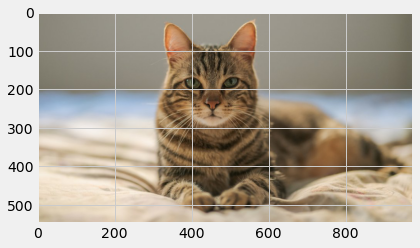

In [22]:
# Test the model with an example
new_image = plt.imread('cat.jpg')

img = plt.imshow(new_image)

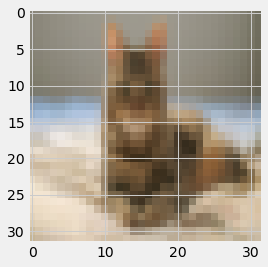

In [23]:
# Problem: it is not a image 32x32 pixels and 3
# Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
iag = plt.imshow(resized_image)

In [24]:
# let's see if the model can predict the image
predictions = model.predict(np.array([resized_image]))

# Show the predictions (10 different probabilites: last one is the one that the model believe the image is)
predictions

array([[7.4173039e-04, 9.3395684e-05, 7.4372292e-02, 4.8620147e-01,
        2.2496084e-02, 3.5255510e-01, 3.2374434e-02, 2.9426575e-02,
        5.1649933e-04, 1.2224250e-03]], dtype=float32)

In [26]:
# Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

# loops to sort automatically x[0][list_index[i]]: probability 
for i in range(10):
    for j in range(10):
            if x[0][list_index[i]] > x[0][list_index[j]]:
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp
                
                
#Show the sorted labels in order
print(list_index) # the highest probability is 3 and after that, index 5


[3, 5, 2, 6, 7, 4, 9, 0, 8, 1]


In [30]:
# Print the first 5 predictions
for i in range(5):
    print(classification[list_index[i]],':',round(predictions[0][list_index[i]]*100,2),'%')  # the model believes the images is a cat with a confidence interval of 48.62%

cat : 48.62 %
dog : 35.26 %
bird : 7.44 %
frog : 3.24 %
horse : 2.94 %
